# Kalman filter to track stereo vision range measurement

Given an input time-series $z$ with process noise $Q$ covariance, the Kalman filter estimates the state $x$ and covariance $P$. <br>
Intermediate predictions $x'$ and $P'$ are used to compute the Kalman gain $K$ while accounting for measurement noise $R$. <br>
The matrix $H$ enables conversions such as GPS latitude co-ordinate to meters, while $i$ is the "innovation" or measurement residue. <br>
An initial value $x_0$ is employed to start the following recursive computations - <br>

$x=x_0$ <br>

$X'=Ax$ <br>
$P'=APA^T + Q$ <br>
$K=P'.H^T(HP'H^T + R)^{-1}$ <br>
$i=z-Hx'$ <br>
$x=x' + iK$ <br>
$P=P' - KHP'$

The Kalman filter implementation in this work is modularized into the following functions
1. Simulate measurements
2. Kalman filter instance
3. Benchmark performance on time-series
4. Visualize results

In [4]:
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt

In [5]:
import simulate_range_measurement

In [6]:
import kalman_range_filter 

In [7]:
import benchmark_range_filter

In [8]:
help(benchmark_range_filter)

Help on module benchmark_range_filter:

NAME
    benchmark_range_filter

FUNCTIONS
    benchmark_range_filter(p0, trueRange, pSigma, nPoints)

FILE
    /Users/vijayvenkatesh/Desktop/Engineering-learning-content/Python/KalmanFiltering/src/benchmark_range_filter.py




In [30]:
# Visualize results

trueRange = 150.0
p0 = 15.0
pSigma = 8.0
nPoints = 100

r = benchmark_range_filter.benchmark_range_filter(p0, trueRange, pSigma, nPoints)

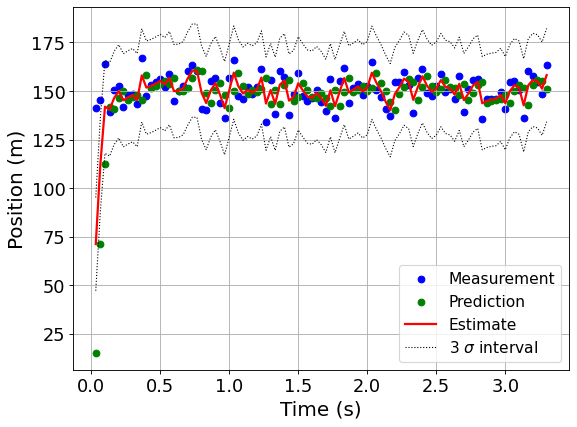

In [40]:
timeIndex = []
posLowBound = []
posUpBound = []
errLowBound = []
errUpBound = []
r0len = len(r[0]) 
for index in range(0,r0len):
    timeIndex.append((1/30.0)*float(r[0][index]))
    posLowBound.append(float(r[2][index]) - 3*pSigma)
    posUpBound.append(float(r[2][index]) + 3*pSigma)
    errLowBound.append(float(r[2][index]) - 3*pSigma - 150.0)
    errUpBound.append(float(r[2][index]) + 3*pSigma - 150.0)
    
# Plot absolute position
fig1 = plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(timeIndex, r[1], color='blue')
plt.scatter(timeIndex, r[7], color='green')
plt.plot(timeIndex, np.squeeze(r[2]), linestyle = 'solid', color='red', linewidth=2)
plt.plot(timeIndex, posLowBound, linestyle = 'dotted', color='black', linewidth=1)
plt.plot(timeIndex, posUpBound, linestyle = 'dotted', color='black', linewidth=1)
plt.xlabel('Time (s)', fontsize=18)
plt.ylabel('Position (m)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['Measurement', 'Prediction', 'Estimate', '3 $\sigma$ interval'], fontsize=14, loc='lower right')
plt.grid('True')

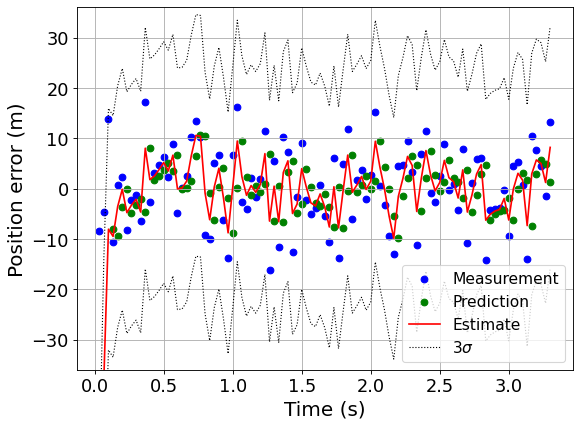

In [34]:
# Plot position error

fig2 = plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(timeIndex, r[3], color='blue')
plt.scatter(timeIndex, r[8], color='green')
plt.plot(timeIndex, np.squeeze(r[4]), color='red')
#plt.plot(timeIndex, np.zeros(len(timeIndex)) - 3*pSigma, color='black', linestyle='dotted')
#plt.plot(timeIndex, np.zeros(len(timeIndex)) + 3*pSigma, color='black', linestyle='dotted')
plt.plot(timeIndex, errLowBound, linestyle = 'dotted', color='black', linewidth=1)
plt.plot(timeIndex, errUpBound, linestyle = 'dotted', color='black', linewidth=1)
plt.legend(['Measurement', 'Prediction', 'Estimate', '3$\sigma$'], fontsize=14, loc='lower right')
plt.xlabel('Time (s)', fontsize=18)
plt.ylabel('Position error (m)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([-4.5*pSigma, 4.5*pSigma])
plt.grid('True')


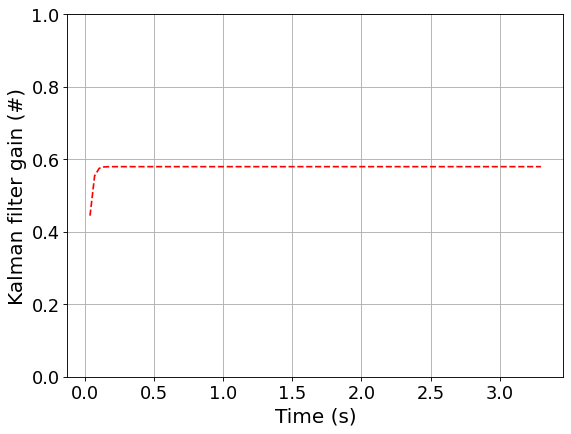

In [39]:
# Plot Kalman gain for position

fig3 = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(timeIndex, np.squeeze(r[6]), linestyle='dashed', color='red')
plt.xlabel('Time (s)', fontsize=18)
plt.ylabel('Kalman filter gain (#)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0,1])
plt.grid('True')